## Sample R script that visualizes LEGO set release data

## Using the `'brickset'` R package which contains a pre-compiled dataset. Sources:
- Brickset: Your LEGO Set Guide. Brickset, 2024, brickset.com

In [80]:
install_and_load("brickset")

## The `'brickset'` package includes a built-in dataset called `'legosets'`.
- This has information on all LEGO sets from 1970 to 2024.

In [81]:
data("legosets")

## Filtering the data to remove sets with missing or zero values for pieces and price.
- Note: The column for Canadian retail price is `'CA_retailPrice'` in the dataset.
- Check all column names by `colnames(legosets)`

In [82]:
lego_analysis_data <- subset(legosets, !is.na(CA_retailPrice) & CA_retailPrice > 0 & pieces > 0 & year >= 2000)
colnames(legosets)

[1] "setID"                 "number"                "numberVariant"        
 [4] "name"                  "year"                  "theme"                
 [7] "themeGroup"            "subtheme"              "category"             
[10] "released"              "pieces"                "minifigs"             
[13] "bricksetURL"           "rating"                "reviewCount"          
[16] "packagingType"         "availability"          "agerange_min"         
[19] "thumbnailURL"          "imageURL"              "US_retailPrice"       
[22] "US_dateFirstAvailable" "US_dateLastAvailable"  "UK_retailPrice"       
[25] "UK_dateFirstAvailable" "UK_dateLastAvailable"  "CA_retailPrice"       
[28] "CA_dateFirstAvailable" "CA_dateLastAvailable"  "DE_retailPrice"       
[31] "DE_dateFirstAvailable" "DE_dateLastAvailable"  "height"               
[34] "width"                 "depth"                 "weight"

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 13 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 13 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


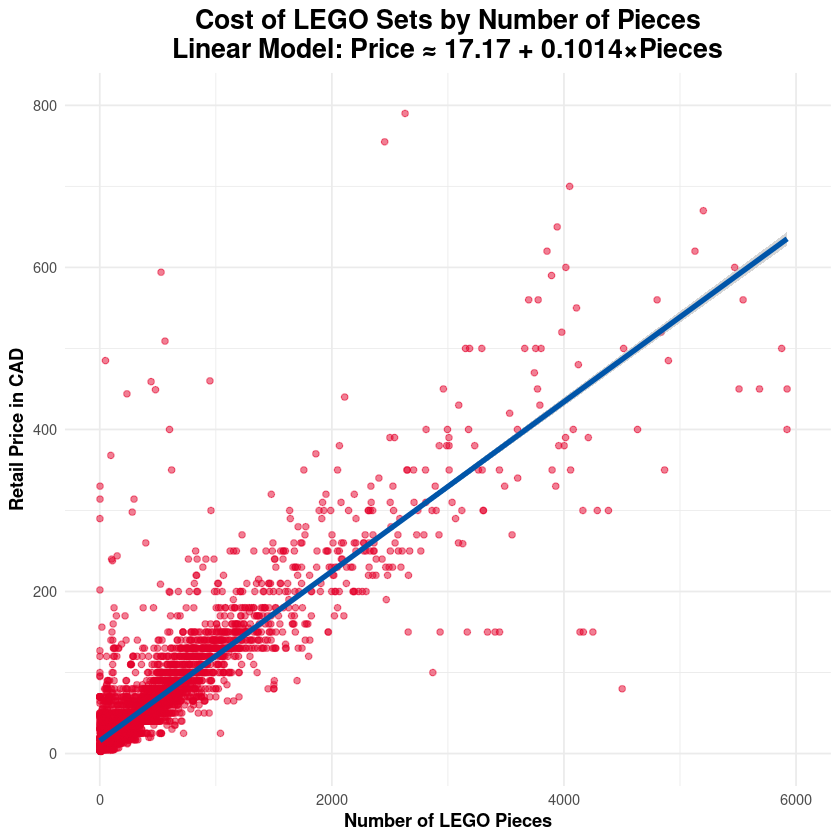

In [83]:
# ---- Creating the Linear Regression Plot ----
plot <- ggplot(lego_analysis_data, aes(x = pieces, y = CA_retailPrice)) +
  geom_point(alpha = 0.5, color = "#E4002B") +  # LEGO red points
  geom_smooth(method = "lm", se = TRUE, color = "#0055A9", linewidth = 1.5) +  # LEGO blue line
  labs(
    title = "Cost of LEGO Sets by Number of Pieces\nLinear Model: Price ≈ 17.17 + 0.1014×Pieces",
    x = "Number of LEGO Pieces",
    y = "Retail Price in CAD"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(face = "bold")
  ) +
  xlim(0, 6000) +
  ylim(0, 800)

# Display the plot
print(plot)
ggsave("Visualization_for_Cost_of_LEGO_Sets_by_Number_of_Pieces1.png", plot = plot, width = 10, height = 7, dpi = 300)

In [84]:
# I am modeling price as a function of pieces.
lm_model <- lm(CA_retailPrice ~ pieces, data = lego_analysis_data)
lm_model

# Summary of the model. 
summary(lm_model)


Call:
lm(formula = CA_retailPrice ~ pieces, data = lego_analysis_data)

Coefficients:
(Intercept)       pieces  
    17.1694       0.1014  



Call:
lm(formula = CA_retailPrice ~ pieces, data = lego_analysis_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-852.89  -13.88   -7.10    5.49  590.52 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.717e+01  6.303e-01   27.24   <2e-16 ***
pieces      1.014e-01  7.558e-04  134.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.78 on 5502 degrees of freedom
Multiple R-squared:  0.7658,	Adjusted R-squared:  0.7658 
F-statistic: 1.799e+04 on 1 and 5502 DF,  p-value: < 2.2e-16


## The provided linear regression model's `Price ≈ 17.17+0.1014×Pieces` equation suggests that a set has a base cost of approximately **\$17.17 CAD**, and for every additional piece, the price is estimated to increase by about **\$0.10 CAD**. This analysis confirms the logical assumption that sets with more pieces are significantly more expensive, while acknowledging that other factors aside from price are not included in the model.